In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import scikit-learn modules for preprocessing, feature selection, and model evaluation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split

# Import scikit-learn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Import scikit-learn modules for hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV, cross_val_score

# Suppress future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [6]:
# Load the Titanic dataset from a CSV file
titanic = pd.read_csv('../data/titanic.csv')

# Display the first 5 rows of the dataset
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Display the shape of the Titanic dataset
print("Shape of the data is", titanic.shape)

# Display the size of the Titanic dataset
print("Size of the data is", titanic.size)


Shape of the data is (891, 12)
Size of the data is 10692


In [8]:
# Display a concise summary of the Titanic DataFrame, including the index dtype and column dtypes, non-null values, and memory usage
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Generate descriptive statistics for the Titanic dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:

titanic.describe  

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

<Axes: >

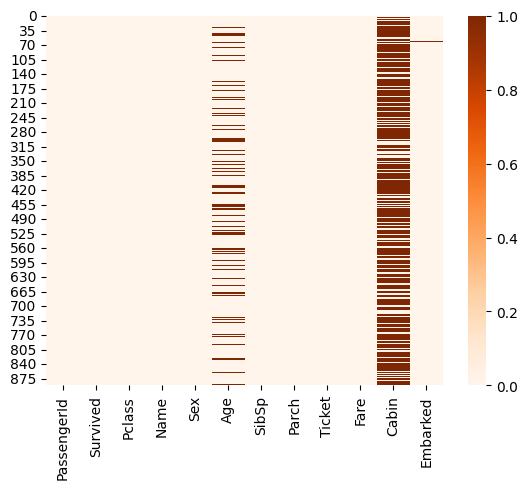

In [11]:
# Plot a heatmap to visualize missing values in the Titanic dataset
sns.heatmap(titanic.isnull(), cmap='Oranges')

In [12]:

# Print rows where 'Cabin' is null
print(titanic[titanic['Cabin'].isnull()])

# Print the number of missing values in 'Cabin'
print("Number of missing values:", titanic['Cabin'].isnull().sum())


     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [13]:
# Fill missing values in the 'Cabin' column with 'C000'
titanic['Cabin'].fillna('C000', inplace=True)

In [14]:
print(titanic[titanic['Cabin'].isnull()])
print("Number of missing values:",titanic['Cabin'].isnull().sum())

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Number of missing values: 0


In [15]:
# Print rows where 'Age' is null
print(titanic[titanic['Age'].isnull()])

# Print the number of missing values in 'Age'
print("Number of missing data in Age:", titanic['Age'].isnull().sum())


     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

In [16]:
# Calculate medians by sex
median_ages = titanic.groupby("Sex")["Age"].median()

# Print the medians in a DataFrame
print(median_ages)

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [17]:
# Fill missing values in the 'Age' column with the median age of the corresponding sex
titanic['Age'].fillna(titanic['Sex'].map(median_ages), inplace=True)

In [18]:
# Print rows where 'Age' is null
print(titanic[titanic['Age'].isnull()])

# Print the number of missing values in 'Age'
print("Number of missing data in Age:", titanic['Age'].isnull().sum())


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Number of missing data in Age: 0


In [19]:
# Print rows where 'Embarked' is null
print(titanic[titanic['Embarked'].isnull()])

# Print the number of missing values in 'Embarked'
print("Number of missing data in Embarked:", titanic['Embarked'].isnull().sum())


     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  
Number of missing data in Embarked: 2


Examine the missing row in Embark and analzye the similar passengers and identify the most common embarked value and replace it with it

In [20]:
#Row with missing embarked 
missing_embarked_row = titanic[titanic['Embarked'].isnull()]
print(missing_embarked_row)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [21]:
# Assuming the passenger with the missing 'Embarked' is in 1st class (Pclass = 1) and has a Fare of 80
# Adjust the class and fare range based on the missing row's details

similar_passengers = titanic[(titanic['Pclass'] == missing_embarked_row['Pclass'].values[0]) & 
                          (titanic['Fare'] >= missing_embarked_row['Fare'].values[0] - 10) & 
                          (titanic['Fare'] <= missing_embarked_row['Fare'].values[0] + 10) & 
                          (titanic['Embarked'].notnull())]

# Display the similar passengers
print(similar_passengers[['Pclass', 'Fare', 'Embarked']])


     Pclass     Fare Embarked
1         1  71.2833        C
34        1  82.1708        C
52        1  76.7292        C
62        1  83.4750        S
102       1  77.2875        S
124       1  77.2875        S
139       1  79.2000        C
218       1  76.2917        C
224       1  90.0000        S
230       1  83.4750        S
245       1  90.0000        Q
256       1  79.2000        C
257       1  86.5000        S
262       1  79.6500        S
275       1  77.9583        S
290       1  78.8500        S
310       1  83.1583        C
366       1  75.2500        C
375       1  82.1708        C
412       1  90.0000        Q
445       1  81.8583        S
453       1  89.1042        C
486       1  90.0000        S
496       1  78.2667        C
504       1  86.5000        S
540       1  71.0000        S
558       1  79.6500        S
585       1  79.6500        S
587       1  79.2000        C
591       1  78.2667        C
627       1  77.9583        S
645       1  76.7292        C
681       

In [22]:
# Find the most common 'Embarked' value among the similar passengers
most_common_embarked = similar_passengers['Embarked'].mode()[0]
print(f"The most common embarkation point for similar passengers is: {most_common_embarked}")


The most common embarkation point for similar passengers is: S


In [23]:
# Replace the missing 'Embarked' value with the most common one found
titanic.loc[titanic['Embarked'].isnull(), 'Embarked'] = most_common_embarked

# Verify the replacement
print(titanic['Embarked'].isnull().sum())  # This should now output 0


0


<Axes: >

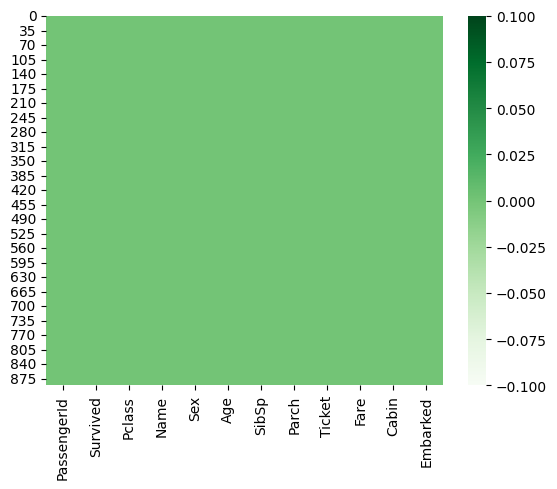

In [24]:
#Checking for null values

sns.heatmap(titanic.isnull(), cmap = 'Greens')

Plot for Age Distribution

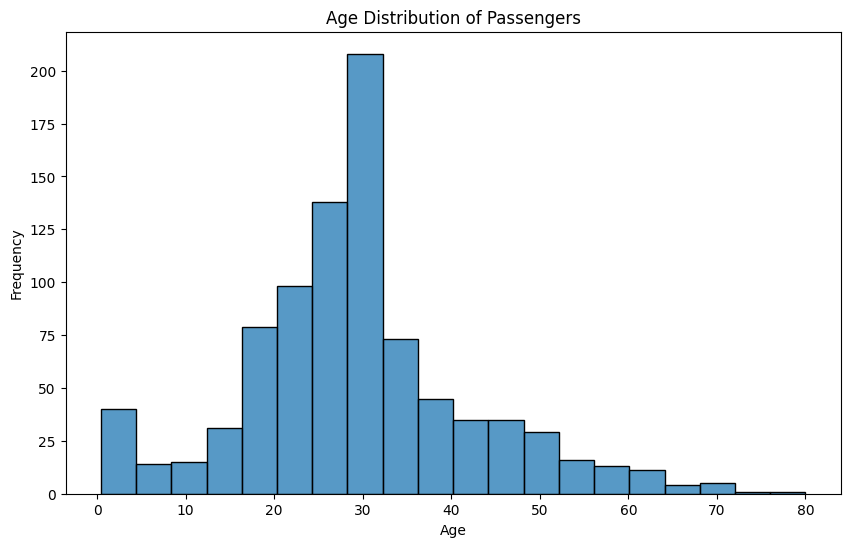

In [25]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram of the 'Age' column with 20 bins and no KDE
sns.histplot(titanic['Age'].dropna(), bins=20, kde=False)

# Set the title of the plot
plt.title('Age Distribution of Passengers')

# Set the x-axis label
plt.xlabel('Age')

# Set the y-axis label
plt.ylabel('Frequency')

# Display the plot
plt.show()



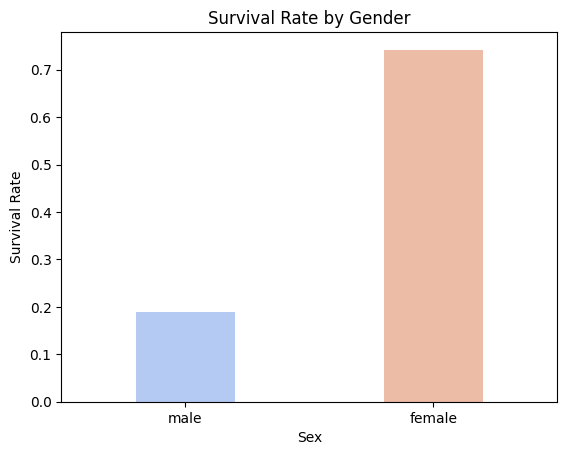

In [26]:
#Gender vs Survival Rate

sns.barplot(x='Sex', y='Survived', data=titanic, palette='coolwarm', ci= None, width=0.4)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
# Display the plot
plt.show()

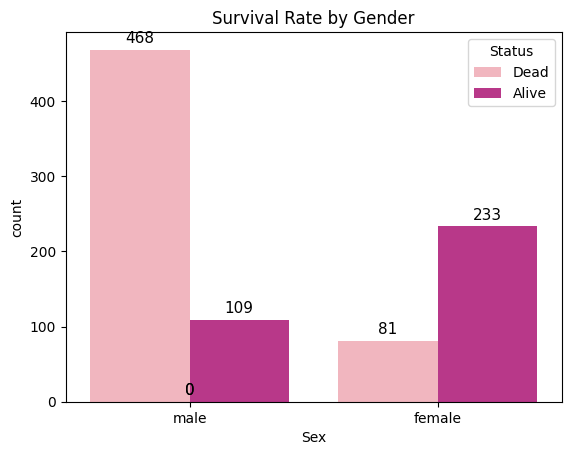

In [27]:
# Change color and label "Survived" values
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='RdPu')#palette={0: 'red', 1: 'green'})
plt.title('Survival Rate by Gender')

# Update legend labels
plt.legend(title='Status', labels=['Dead', 'Alive'])

# Annotate the count at the top of each bar
for p in plt.gca().patches:
    plt.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

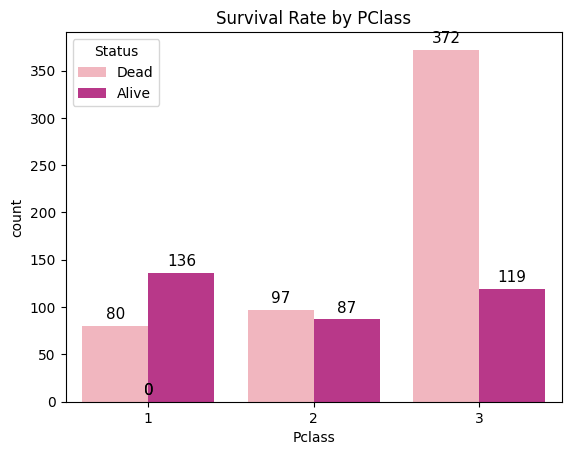

In [28]:
# Change color and label "Survived" values
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='RdPu')#palette={0: 'red', 1: 'green'})
plt.title('Survival Rate by PClass')

# Update legend labels
plt.legend(title='Status', labels=['Dead', 'Alive'])

# Annotate the count at the top of each bar
for p in plt.gca().patches:
    plt.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

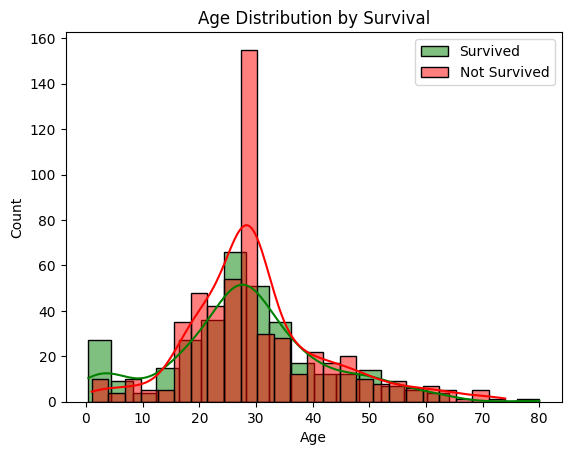

In [29]:

# Plot the age distribution for passengers who survived
sns.histplot(titanic[titanic['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)

# Plot the age distribution for passengers who did not survive
sns.histplot(titanic[titanic['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True)

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title('Age Distribution by Survival')

# Display the plot
plt.show()

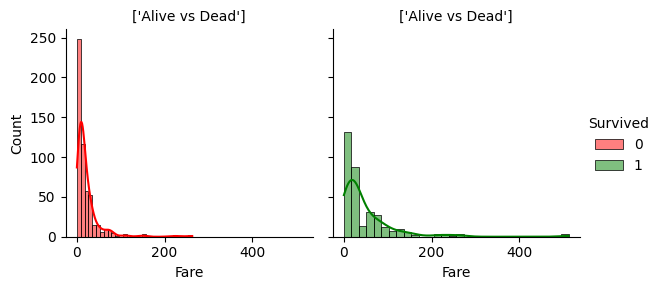

In [30]:
# Create a FacetGrid with columns based on 'Survived' and color by 'Survived'
g = sns.FacetGrid(titanic, col='Survived', hue='Survived', palette={0: 'red', 1: 'green'}, col_wrap=2)

# Map a histogram plot to the grid for the 'Fare' column with KDE and 30 bins
g.map(sns.histplot, 'Fare', kde=True, bins=30)

# Set the titles for the FacetGrid
g.set_titles(['Alive vs Dead'])

# Add a legend to the plot
g.add_legend()

# Display the plot
plt.show()


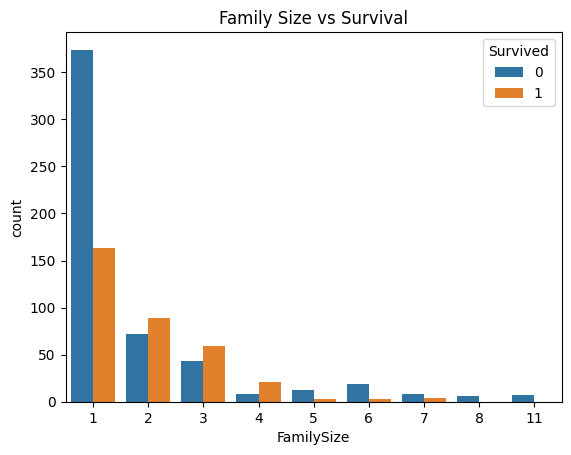

In [31]:
#Family Size vs Survial


# Calculate family size by summing siblings/spouses and parents/children, then adding 1 for the individual
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Create a count plot to visualize the relationship between family size and survival
sns.countplot(x='FamilySize', hue='Survived', data=titanic)

# Set the title of the plot
plt.title('Family Size vs Survival')

# Display the plot
plt.show()

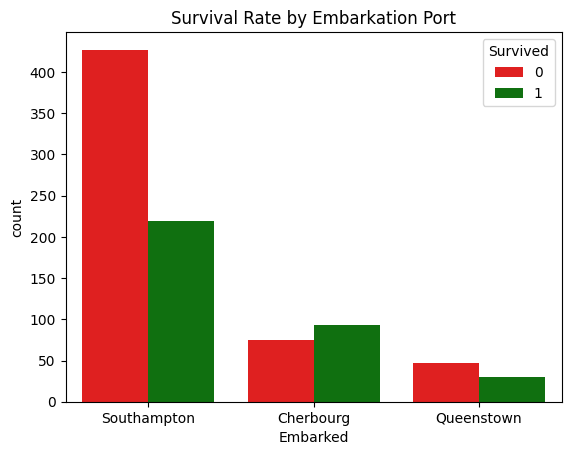

In [32]:
# Map embarkation codes to full names
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
titanic['Embarked'] = titanic['Embarked'].map(port_names)

# Plot
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette={0: 'red', 1: 'green'})
# Set the title of the plot
plt.title('Survival Rate by Embarkation Port')
plt.show()


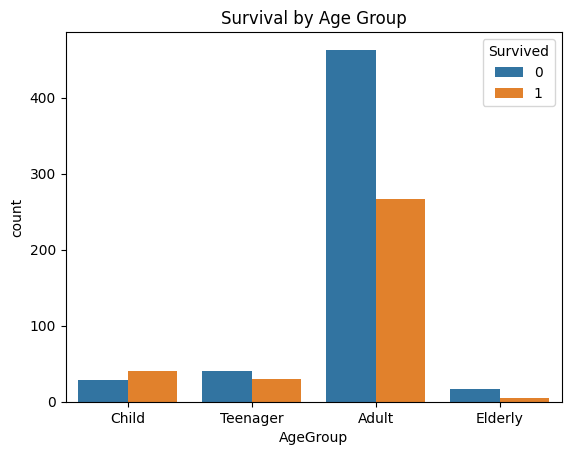

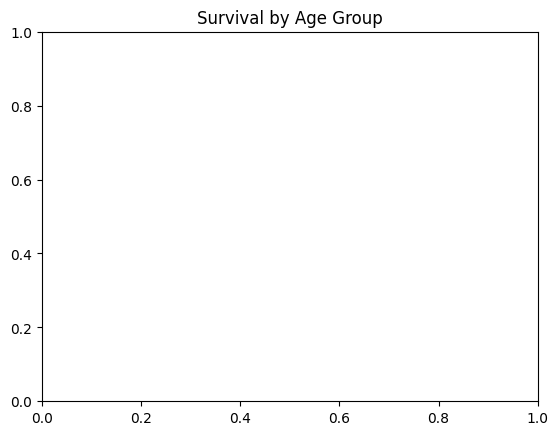

In [33]:

#Survival by Age Group

# Define the bins for age groups
bins = [0, 12, 18, 60, 100]

# Define the labels for each age group
labels = ['Child', 'Teenager', 'Adult', 'Elderly']

# Create a new column 'AgeGroup' in the Titanic DataFrame based on the defined bins and labels
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

# Plot the count of survivors and non-survivors within each age group
sns.countplot(x='AgeGroup', hue='Survived', data=titanic)

# Set the title of the plot
plt.title('Survival by Age Group')

# Display the plot
plt.show()
plt.title('Survival by Age Group')
plt.show()


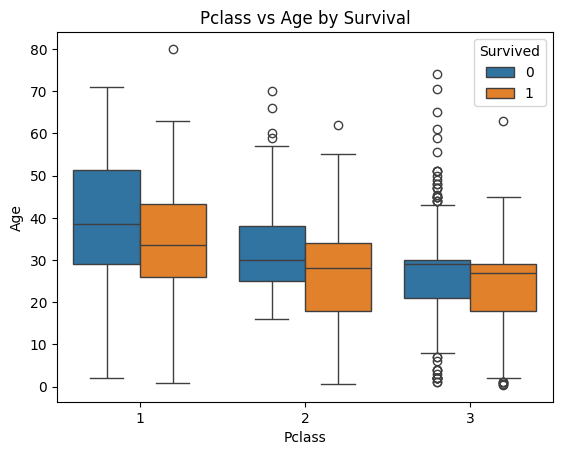

In [34]:
#Pclass and Age Interaction

sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic)
plt.title('Pclass vs Age by Survival')
# Display the plot
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
/var/folders/sw/gdzyxsvx1q7d9xw9jz980hv00000gn/T/ipykernel_54271/1960683874.py:6: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


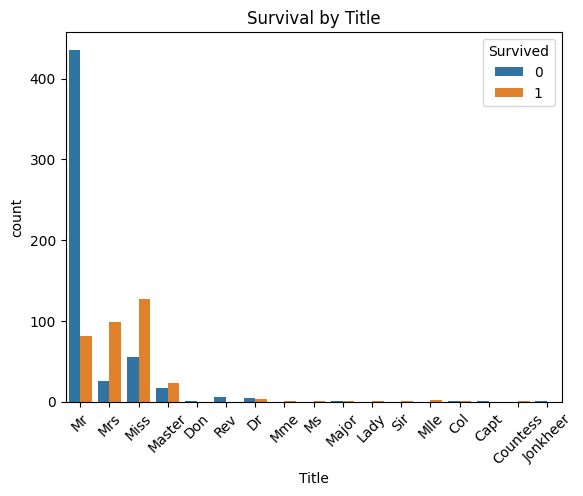

In [35]:
#Survival by Title



# Extract titles from the 'Name' column and create a new column 'Title'
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create a count plot to visualize the relationship between titles and survival
sns.countplot(x='Title', hue='Survived', data=titanic)

# Set the title of the plot
plt.title('Survival by Title')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



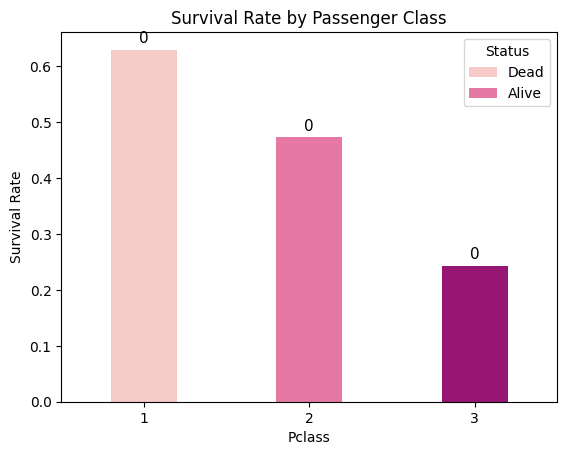

In [36]:
#Passenger Class vs Survival Rate
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic, palette = 'RdPu', ci = None, width = 0.4)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

# Update legend labels
plt.legend(title='Status', labels=['Dead', 'Alive'])

# Annotate the count at the top of each bar
for p in plt.gca().patches:
    plt.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()


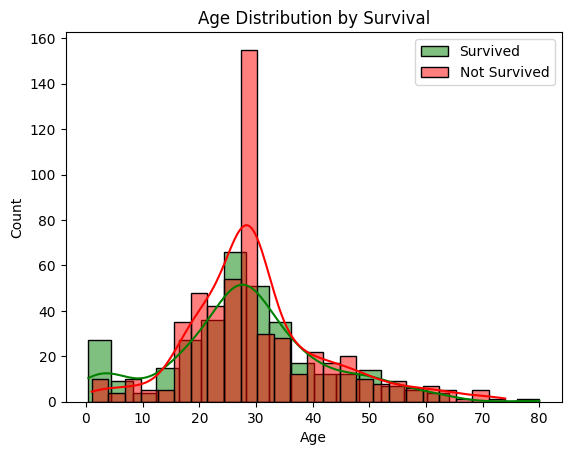

In [37]:

# Plot the age distribution for passengers who survived
sns.histplot(titanic[titanic['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)

# Plot the age distribution for passengers who did not survive
sns.histplot(titanic[titanic['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True)

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title('Age Distribution by Survival')

# Display the plot
plt.show()

Feature Engineering

In [38]:
#Title Extraction:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/sw/gdzyxsvx1q7d9xw9jz980hv00000gn/T/ipykernel_54271/1044766530.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [39]:
#Adding Family Size

titanic['Family Size'] = titanic['SibSp'] + titanic['Parch'] + 1

print(titanic.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin     Embarked  FamilySize AgeGroup  \
0      0         A/5 21171   7.2500  C000  Southampton           2    Adult   
1      0          PC 17599  71.2833   C85    Cherbourg           2    Adult   
2      0  STON/O2. 3101282   7.9250  C000  Southampton           1    Adult   
3   

In [40]:
#IsAlone Function

titanic['Is Alone'] = (titanic['FamilySize'] == 1).astype(int)


In [41]:
# Print the first 10 rows of the Titanic DataFrame to get an overview of the data
print(titanic.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54

In [42]:
#Creating Fare Bins

fare_bins = [0, 20, 50, 100, float('inf')]
fare_labels = ['Low', 'Medium', 'High', 'Very High']

In [43]:
titanic['Fare Bin'] = pd.cut(titanic['Fare'], bins=fare_bins, labels=fare_labels, include_lowest = True)


In [44]:
# Print the first five rows of the 'Fare' and 'Fare Bin' columns from the Titanic dataset
print(titanic[['Fare', 'Fare Bin']].head())


      Fare Fare Bin
0   7.2500      Low
1  71.2833     High
2   7.9250      Low
3  53.1000     High
4   8.0500      Low


In [45]:
# Creating Age Bins

# Define the bins for age groups
age_bins = [0, 12, 20, 40, 60, float('inf')]

# Define the labels for each age group
age_labels = ['Child', 'Teenager', 'Adult', 'Senior', 'Elderly']

In [46]:
# Create a new column 'Age Bin' in the Titanic DataFrame by binning the 'Age' column
# Use the predefined bins 'age_bins' and labels 'age_labels'
# Include the lowest value in the first bin
titanic['Age Bin'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [47]:
print(titanic.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54

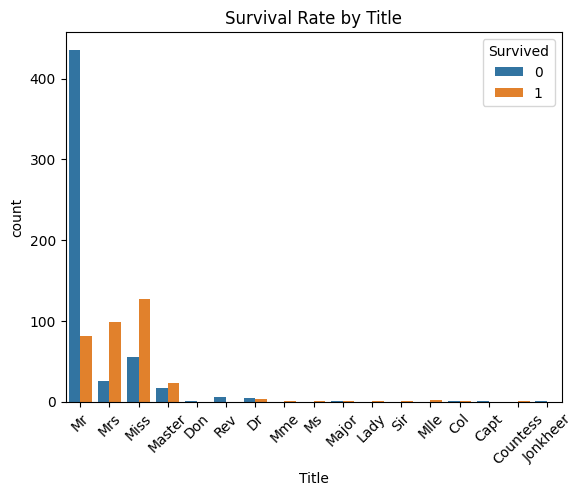

In [48]:
#Title and Survival


# Create a count plot to visualize the relationship between titles and survival
sns.countplot(x='Title', hue='Survived', data=titanic)

# Set the title of the plot
plt.title('Survival Rate by Title')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


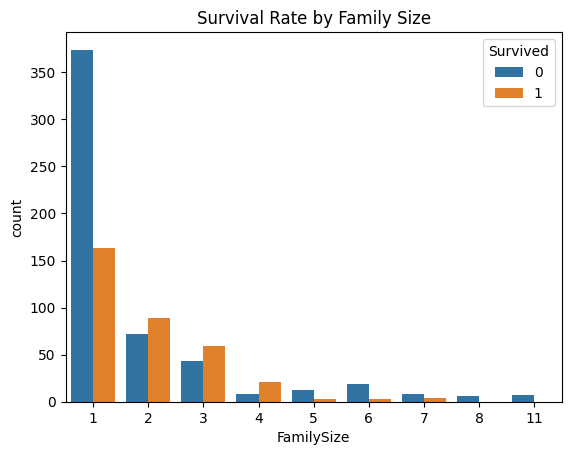

In [49]:
#Family Size and Survival

sns.countplot(x='FamilySize', hue='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.show()


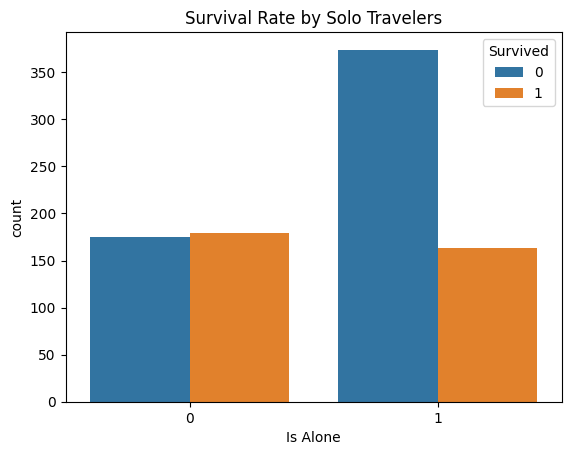

In [50]:
#IsAlone and Survival

sns.countplot(x='Is Alone', hue='Survived', data=titanic)
plt.title('Survival Rate by Solo Travelers')
plt.show()


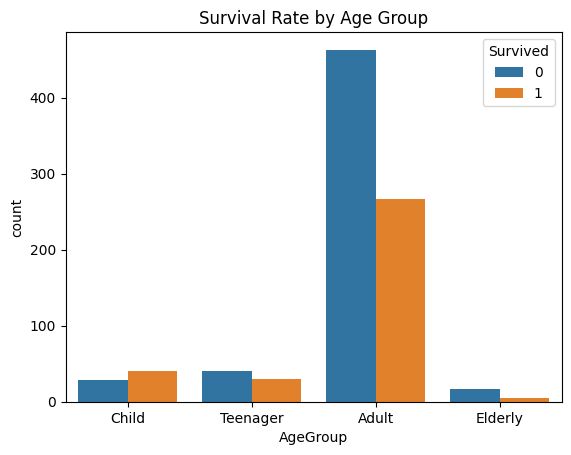

In [51]:
sns.countplot(x='AgeGroup', hue='Survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.show()
#

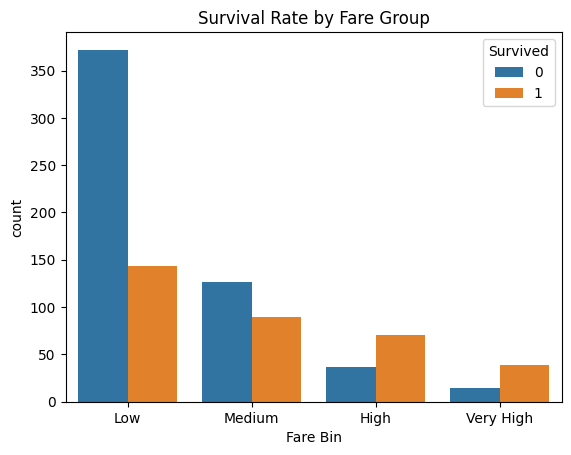

In [52]:
#fare Group vs Survival

sns.countplot(x='Fare Bin', hue='Survived', data=titanic)
plt.title('Survival Rate by Fare Group')
plt.show()


In [53]:
#convert Categorical Features

# Perform one-hot encoding
data_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Fare Bin', 'Age Bin'])
print(data_encoded.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  ...  Embarked_Southampton Fare Bin_Low  \
0         A/5 21171   7.2500  C000  ...                  True         True   
1          PC 17599  71.2833   C85  ...                 False        False   
2  STON/O2. 3101282   7.9250  C000  ...                  True         True   
3            1

FEATURE SELECTION AND MODEL BUILDING

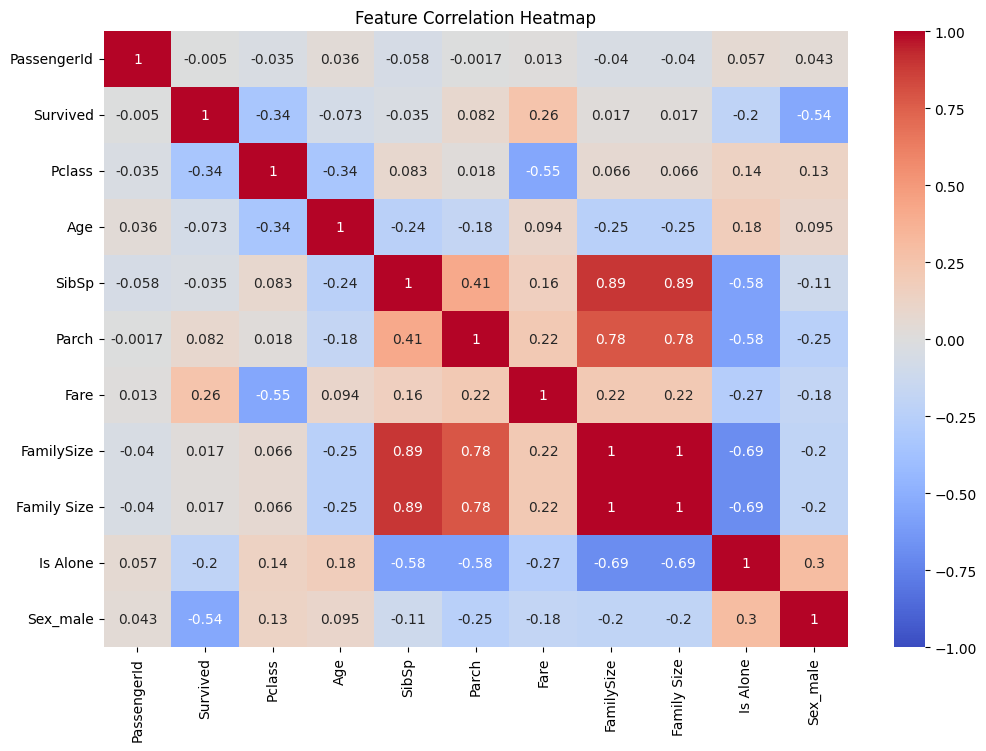

In [54]:
# Drop non-numeric columns
titanic_numeric = titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Fare Bin', 'Age Bin', 'AgeGroup'], axis=1)

# Convert categorical columns like 'Sex' to numeric using one-hot encoding
titanic_numeric = pd.get_dummies(titanic_numeric, drop_first=True)

# Check for missing values and fill them (if any)
titanic_numeric = titanic_numeric.fillna(titanic_numeric.median())

# Compute the correlation matrix
corr_matrix = titanic_numeric.corr()

plt.figure(figsize=(12,8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()





In [55]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [56]:
# Assuming X and y are your feature and target variables
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Apply the ColumnTransformer
X_encoded = preprocessor.fit_transform(X)

In [57]:
# Apply SelectKBest

selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X_encoded, y)

# Get selected feature names
# Extract feature names from the transformer
feature_names = (
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
)

# Combine feature names from one-hot encoding with numerical columns
all_feature_names = list(feature_names) + list(numerical_cols)
selected_features = [all_feature_names[i] for i in range(len(all_feature_names)) if selector.get_support()[i]]


print("Selected Features:", selected_features)

Selected Features: ['Sex_female', 'Sex_male', 'Cabin_C000', 'Embarked_Cherbourg', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Pclass', 'Fare', 'Is Alone']


MODEL BUILDING

In [58]:
# Split the data into training and testing sets



X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [59]:
# Dictionary to store models and results
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}


In [60]:
# Dictionary to store model results
model_results = {}

# Convert X_test to dense format
X_train_dense = X_train.toarray()  # Convert training data
X_test_dense = X_test.toarray()     # Convert test data

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_dense, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_dense)
    
    # Print model performance
    model_results[model_name] = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Display confusion matrix
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Training Decision Tree...
Decision Tree Accuracy: 0.8044692737430168
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Decision Tree Confusion Matrix:
 [[93 12]
 [23 51]]

Training Logistic Regression...
Logistic Regression Accuracy: 0.776536312849162
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Logistic Regression Confusion Matrix:
 [[85 20]
 [20 54]]

Tr

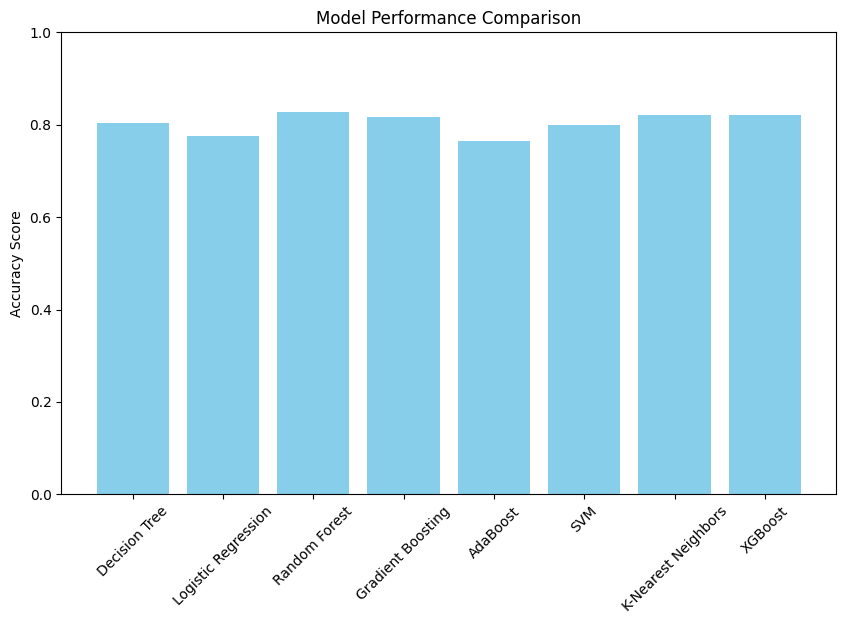

In [61]:
# Plot the model performance as a vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(model_results.keys()), list(model_results.values()), color='skyblue')

# Add labels and title
plt.ylabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Since accuracy is between 0 and 1
plt.xticks(rotation=45)  # Rotate the model names for better readability

# Display the plot
plt.show()


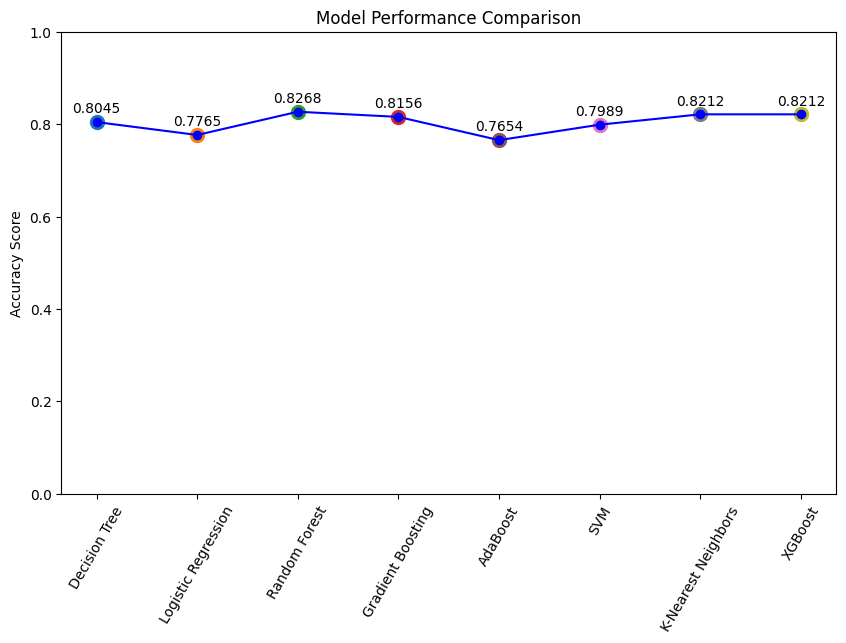

In [62]:
# Plot the model performance as a line chart
plt.figure(figsize=(10, 6))

# Generate a line plot with different colors for each model
plt.plot(list(model_results.keys()), list(model_results.values()), marker='o', color='b', linestyle='-', label='Accuracy')

# Customize the plot
plt.ylabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Accuracy score is between 0 and 1

# Add model points with different colors
for i, (model, accuracy) in enumerate(model_results.items()):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', color='black')
    plt.scatter(i, accuracy, color=plt.cm.tab10(i / len(model_results)), s=100)  # Different color for each model

# Add ticks and rotate x-axis labels
plt.xticks(rotation=60)

# Show the plot
plt.show()


In [63]:
# Define a dictionary to store hyperparameter grids for each model
param_grid = {
    # Hyperparameter grid for Decision Tree
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
    },
    # Hyperparameter grid for Logistic Regression
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],     # Inverse of regularization strength
        'penalty': ['l1', 'l2'],          # Norm used in the penalization
        'solver': ['liblinear', 'saga']   # Algorithm to use in the optimization problem
    },
    # Hyperparameter grid for Random Forest
    'Random Forest': {
        'n_estimators': [50, 100, 200],   # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
    },
    # Hyperparameter grid for Gradient Boosting
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],   # Number of boosting stages to be run
        'learning_rate': [0.01, 0.1, 0.2],# Learning rate shrinks the contribution of each tree
        'max_depth': [3, 5, 7],           # Maximum depth of the individual regression estimators
        'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
    },
    # Hyperparameter grid for AdaBoost
    'AdaBoost': {
        'n_estimators': [50, 100, 200],   # Number of boosting stages to be run
        'learning_rate': [0.01, 0.1, 1.0] # Learning rate shrinks the contribution of each classifier
    },
    # Hyperparameter grid for Support Vector Machine (SVM)
    'SVM': {
        'C': [0.1, 1, 10],                # Regularization parameter
        'kernel': ['linear', 'rbf'],      # Specifies the kernel type to be used in the algorithm
        'gamma': ['scale', 'auto']        # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    },
    # Hyperparameter grid for K-Nearest Neighbors (KNN)
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 10, 15],    # Number of neighbors to use
        'weights': ['uniform', 'distance'],# Weight function used in prediction
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # Algorithm used to compute the nearest neighbors
    },
    # Hyperparameter grid for XGBoost
    'XGBoost': {
        'n_estimators': [50, 100, 200],   # Number of boosting stages to be run
        'learning_rate': [0.01, 0.1, 0.2],# Learning rate shrinks the contribution of each tree
        'max_depth': [3, 5, 7],           # Maximum depth of the individual regression estimators
        'subsample': [0.5, 0.7, 1.0],     # Subsample ratio of the training instances
        'colsample_bytree': [0.5, 0.7, 1.0] # Subsample ratio of columns when constructing each tree
    }
}


In [64]:
#Perform Grid Search

best_models = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name],
                               scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_dense, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Tuning hyperparameters for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Tuning hyperparameters for SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
Tun

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [65]:

# Dictionary to store model predictions and metrics

unbalanced_model_metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': []
}

# Convert X_test to dense format
X_test_dense = X_test.toarray()

# Iterate over best models, generate predictions and classification reports
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_dense)
    #print(f"\nClassification report for {model_name}:")
    #print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    unbalanced_model_metrics['Model'].append(model_name)
    unbalanced_model_metrics['Precision'].append(precision)
    unbalanced_model_metrics['Recall'].append(recall)
    unbalanced_model_metrics['F1-Score'].append(f1)
    unbalanced_model_metrics['Accuracy'].append(accuracy)

# Convert the dictionary to a DataFrame
unbalanced_metrics_df = pd.DataFrame(unbalanced_model_metrics)

# Print the DataFrame containing all the metrics
print("\nMetrics Summary:")
print(unbalanced_metrics_df)



Metrics Summary:
                 Model  Precision    Recall  F1-Score  Accuracy
0        Decision Tree   0.822581  0.689189  0.750000  0.810056
1  Logistic Regression   0.710526  0.729730  0.720000  0.765363
2        Random Forest   0.805556  0.783784  0.794521  0.832402
3    Gradient Boosting   0.819444  0.797297  0.808219  0.843575
4             AdaBoost   0.720000  0.729730  0.724832  0.770950
5                  SVM   0.794118  0.729730  0.760563  0.810056
6  K-Nearest Neighbors   0.808824  0.743243  0.774648  0.821229
7              XGBoost   0.776119  0.702703  0.737589  0.793296


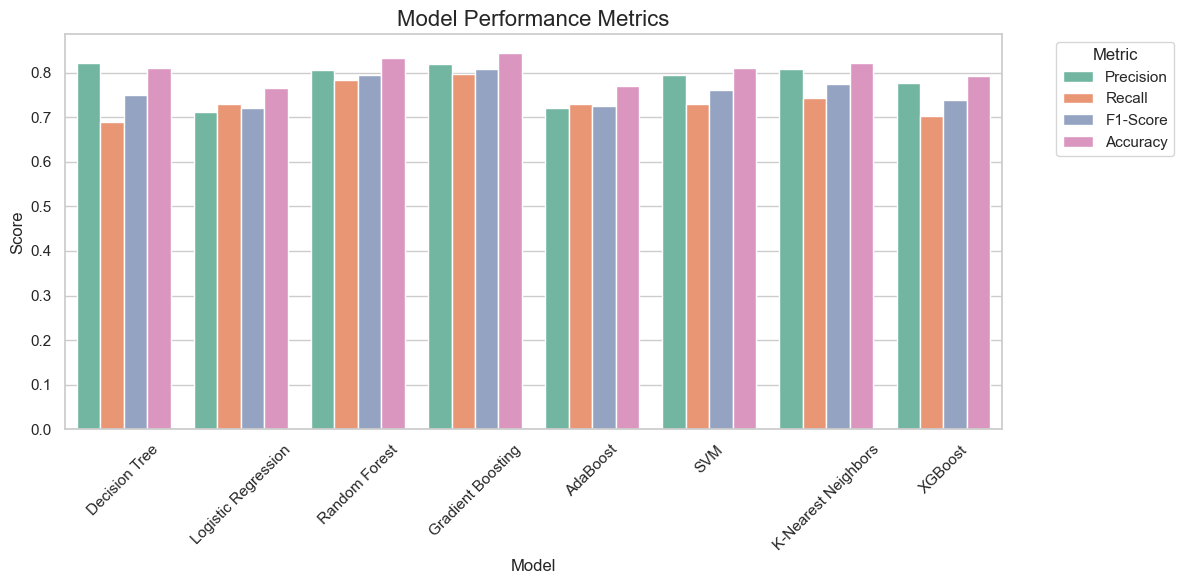

In [66]:

# Set the plot style
sns.set(style="whitegrid")

# Melt the DataFrame to make it suitable for seaborn's barplot
unbalanced_metrics_melted = unbalanced_metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the grouped bar plot
sns.barplot(x="Model", y="Value", hue="Metric", data=unbalanced_metrics_melted, palette="Set2")

# Add title and labels
plt.title("Model Performance Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


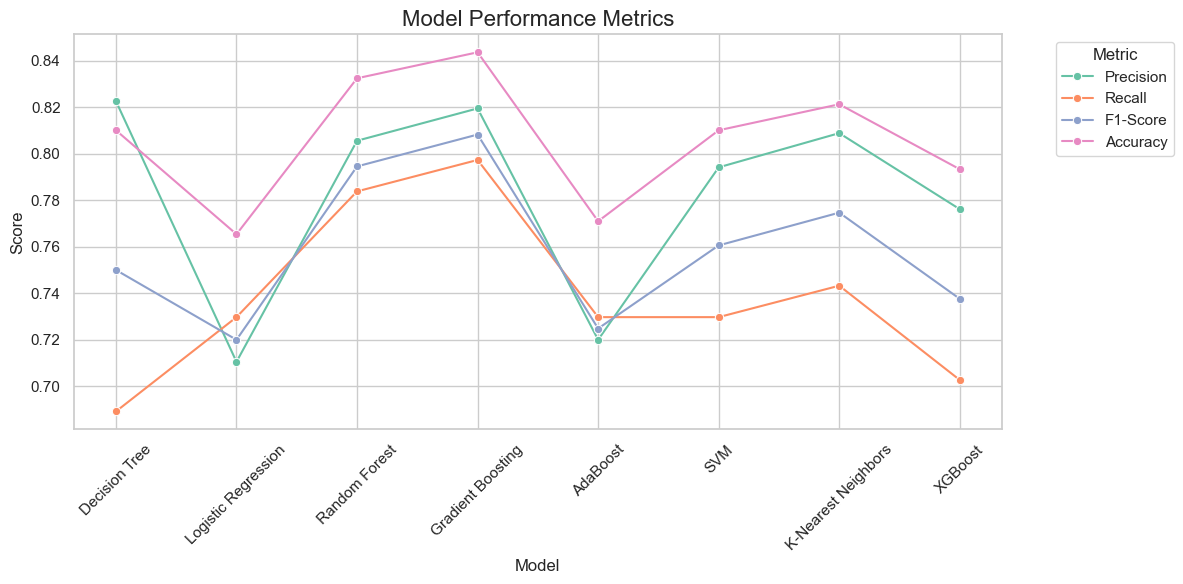

In [67]:
#Line Plot Visualization

plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(x="Model", y="Value", hue="Metric", data=unbalanced_metrics_melted, marker="o", palette="Set2")

# Add title and labels
plt.title("Model Performance Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [68]:
#Cross-Validation


for model_name, model in best_models.items():
    scores = cross_val_score(model, X_train_dense, y_train, cv=5)
    print(f"{model_name} Cross-validation scores: {scores.mean()} ± {scores.std()}")


Decision Tree Cross-validation scores: 0.7935782527331824 ± 0.013852011045465809
Logistic Regression Cross-validation scores: 0.7962868117797696 ± 0.0345276761217096
Random Forest Cross-validation scores: 0.8090219639515415 ± 0.022957820827087153
Gradient Boosting Cross-validation scores: 0.8244558258642766 ± 0.015206179604920355
AdaBoost Cross-validation scores: 0.8047276666994977 ± 0.02893603627696586
SVM Cross-validation scores: 0.8145572737122032 ± 0.027607967344433222
K-Nearest Neighbors Cross-validation scores: 0.8033980104402639 ± 0.016886903773411514
XGBoost Cross-validation scores: 0.8272333300502315 ± 0.01655651576598608


In [69]:
import joblib

# Save the best_models dictionary to a file
joblib_file = "Titanic Survival Prediction.pkl"
joblib.dump(best_models, joblib_file)

print(f"Models saved to {joblib_file}")

Models saved to Titanic Survival Prediction.pkl


In [73]:
import pickle
import os

# Create the models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the model in the models subfolder
with open('../models/Titanic Survival Prediction.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!
